## Problem 1

#### The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle

In [4]:
prob = stats.norm.sf(5)
stats.poisson.isf(prob, 100)

154.0

The 5σ sensitivity threshold for a background with a poisson distribution with parameter 100 is 154

## Problem 2

#### Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

#### a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

In [5]:
bkgrnd = stats.poisson.rvs(100, size = 1000000)
bkgrnd

array([ 92, 104,  89, ...,  73, 101, 109])

signal at 8 sigma

In [6]:
prob = stats.norm.sf(8)
signal = stats.poisson.isf(prob, 100)
signal = signal + 1
signal

191.0

Thus, the signal at 8 sigma is of value 191.0.We inject a signal of value 191.0 to our background.   

In [7]:
data = bkgrnd + signal
max(data)

341.0

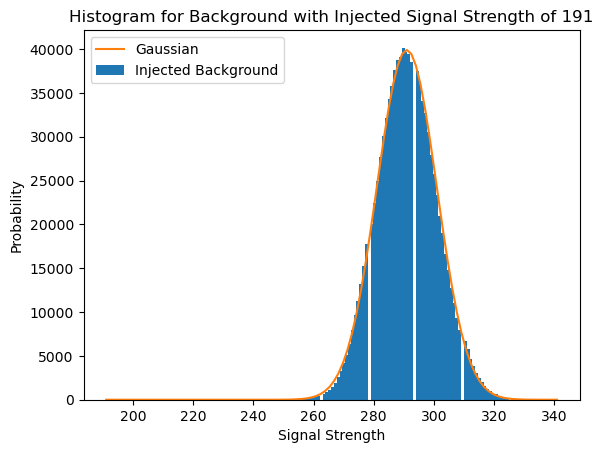

In [8]:
plt.hist(data, bins = 100, label = "Injected Background")

x = np.linspace(191, max(data), 100)
y = stats.norm.pdf(x, loc = 291, scale=10)* 1000000
plt.plot(x, y, label = "Gaussian")
plt.legend()
plt.title("Histogram for Background with Injected Signal Strength of 191")
plt.xlabel("Signal Strength")
plt.ylabel("Probability")
plt.show()

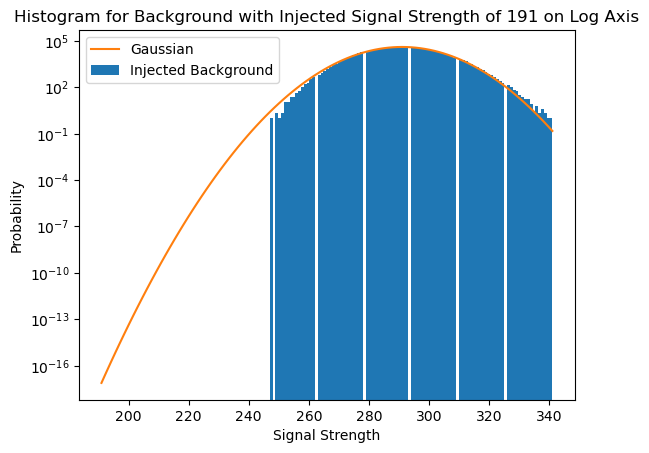

In [9]:
plt.hist(data, bins = 100, label = "Injected Background")

x = np.linspace(191, max(data), 100)
y = stats.norm.pdf(x, loc = 291, scale=10)* 1000000
plt.plot(x, y, label = "Gaussian")
plt.title("Histogram for Background with Injected Signal Strength of 191 on Log Axis")
plt.xlabel("Signal Strength")
plt.ylabel("Probability")
plt.yscale('log')
plt.legend()
plt.show()

We can see that both the histograms for the background signal with injected signal strength of 191 on the regular and log axis are pretty close to a Gaussian Distribution of mean 291 and std dev. 100.However the distribution is not exactly Gaussian. Thus we can say the the central theorem holds true, as we have many samples of poisson distribution with parameter 100 to which 191 is added to each of the signal and the distribution of these samples is approching gaussian but will never be Gaussian.

The mean of the Distribution is the same as the parameter for the poisson distribution. As we added a signal of 191 to every signal the mean changes from 100 to 291 (100 + 191).

#### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

Yes, as our original background has a poisson distribution of positive signals and our true signal of value 191 is injected onto it the resultant observed signal can only be equal to or stronger than the true injected signal.Thus, our observed signal is biased.However, it is symmetric around the mean value of 291.

## Problem 3

#### Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

#### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

We draw an ample amount of values from the  Poisson background distribution with parameter 100.Then we generate uniformly distributed random signal strength ranging from 0 to 500. We then add our signals to our background to get the observed data readings Since we know what the true signal was for each data reading, and you used a flat prior, you now have  P(data|signal)P(signal). Now make one of the 2D histograms as shown in class. Here we want to histogram the true signal vs. the observed data readings. .

In [10]:
true_signal = np.random.uniform(0, 500, size=1000000)

In [11]:
true_signal

array([217.48514705, 211.78807082, 164.66481201, ..., 239.2870245 ,
       321.23235193, 210.51283816])

Text(0.5, 1.0, 'True Signal vs Observed Signal')

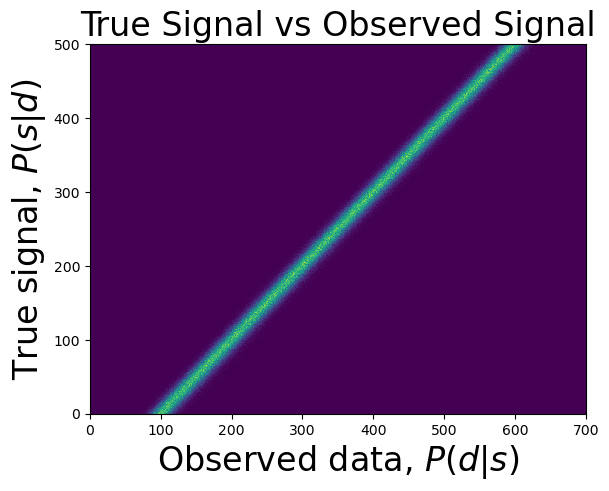

In [12]:
data = bkgrnd + true_signal

signaledges = np.linspace(0,500,501)
dataedges = np.linspace(0,700,701)

Psd, temp, temp2= np.histogram2d(data,true_signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title("True Signal vs Observed Signal", fontsize = 24)

#### b) For the same injected signal power as in problem 2, show that you get the same answer.


In [13]:
true_signal = 191
true_signal_bin_idx = -1
for i in range(0, len(signaledges)-1):
    if signaledges[i] <= true_signal and signaledges[i+1] >= true_signal:
        true_signal_bin_idx = i
        break
        

true_signal_probs = Psd[::5, true_signal_bin_idx]

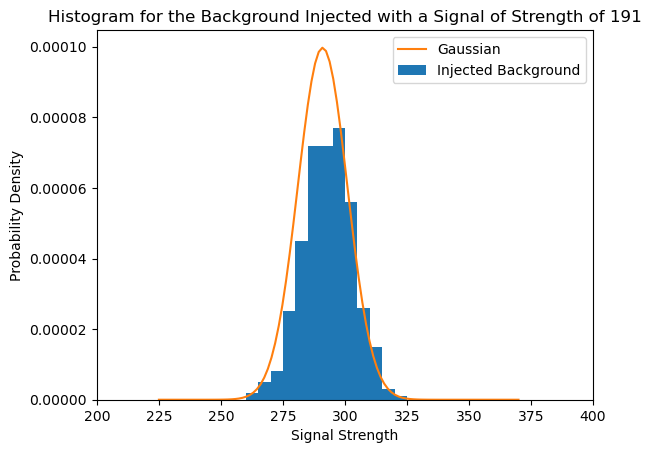

In [14]:
dataedges = np.linspace(0,700, 141)
plt.xlim(200,400)
plt.stairs(true_signal_probs, dataedges, fill = True, label = "Injected Background")

x = np.linspace(225, 370, 100)
y = stats.norm.pdf(x, loc = 291, scale=10) * .0025
plt.plot(x, y, label = "Gaussian")
plt.xlabel("Signal Strength")
plt.ylabel("Probability Density")
plt.title("Histogram for the Background Injected with a Signal of Strength of 191")
plt.legend()
plt.show()


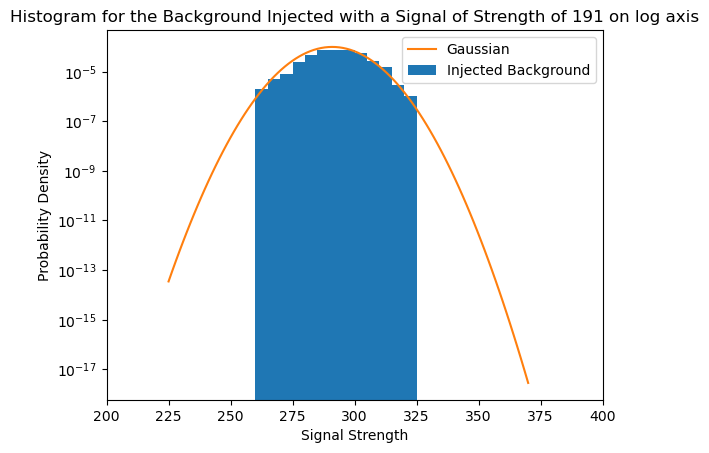

In [15]:
dataedges = np.linspace(0,700, 141)
plt.xlim(200,400)
plt.stairs(true_signal_probs, dataedges, fill = True, label = "Injected Background")

x = np.linspace(225, 370, 100)
y = stats.norm.pdf(x, loc = 291, scale=10) * .0025
plt.plot(x, y, label = "Gaussian")
plt.xlabel("Signal Strength")
plt.ylabel("Probability Density")
plt.title("Histogram for the Background Injected with a Signal of Strength of 191 on log axis")
plt.legend()
plt.yscale('log')
plt.show()


We can see that both the histograms for the background signal with injected signal strength of 191 on the regular and log axis are pretty close to a Gaussian Distribution of mean 291 (191 + 100) and std dev. 10 but not exactly equal to the gaussian distribution.Thus we can say that the distribution is same as the Background with Injected Signal Strength of 191 we saw in Problem 2. for the mean 191 is added to 100 because the distribution having a nonzero mean results in a shift left for vertical slices because the positive mean value shifts the horizontal slices to the right.

#### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.



observed signal at 5 sigma 

In [16]:
prob = stats.norm.sf(5)
signal = stats.poisson.isf(prob, 100)
signal

154.0

We pick a data value of 260 which is stronger than 5σ. We need to take a vertical slice of the 2D histogram where the value of the observed data is 260

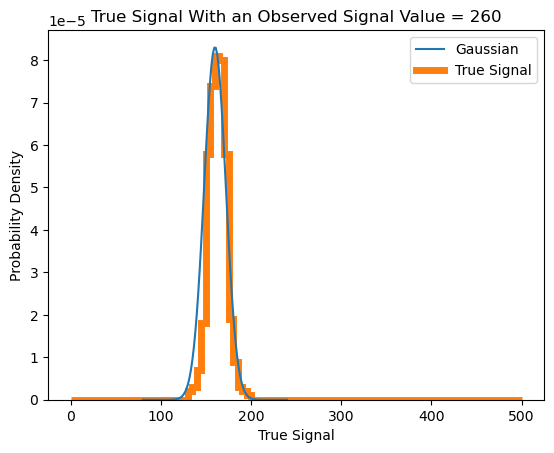

In [30]:
p2_true_signal = 260


        

p2_true_signal_probs = Psd[260, ::5]
signaledges = np.linspace(0,500,101)
dataedges = np.linspace(0,700, 101)
x = np.linspace(80, 240, 100)
y = stats.norm.pdf(x, loc = 160, scale=12) * .0025
plt.plot(x, y, label = "Gaussian")
plt.stairs(p2_true_signal_probs, signaledges, linewidth=5, label = "True Signal")
plt.title("True Signal With an Observed Signal Value = 260")
plt.xlabel("True Signal")
plt.ylabel("Probability Density")
plt.legend()

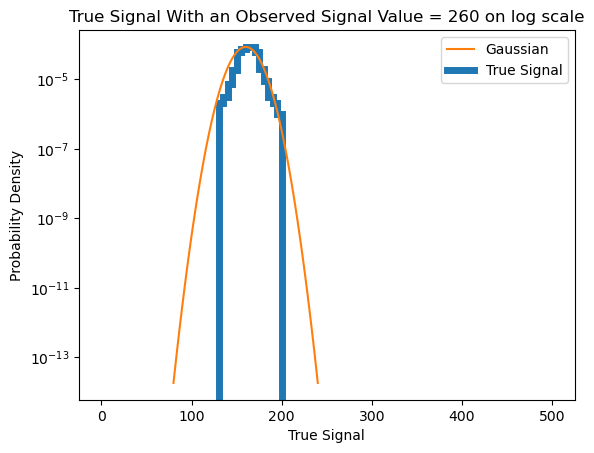

In [35]:
plt.stairs(p2_true_signal_probs, signaledges, linewidth=5,label = "True Signal" )
plt.title("True Signal With an Observed Signal Value = 260 on log scale")
plt.xlabel("True Signal")
plt.ylabel("Probability Density")
plt.yscale("log")
x = np.linspace(80, 240, 100)
y = stats.norm.pdf(x, loc = 160, scale=12) * .0025
plt.plot(x, y, label = "Gaussian")
plt.legend()

The above plots give us the probability of measuring various True Signals given that our observed signal is 260 and our background has a poisson distribution with parameter as 100.The mean of the plot is 160 (260 - 100). The distribution having a nonzero mean results in a shift left for vertical slices because the positive mean value shifts the horizontal slices to the right which in turn shifts the vertical distributions down.We can see that the plots are similar to the gaussian distribution with mean as 160 and std. dev = 12.But not exactly the same this is due to the central limit theorem which states that , when independent random variables are summed up, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed.But they will never be an exactl Gaussian distribution.

#### d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

We can see that the plots are similar to the gaussian distribution with mean as 160 and std. dev = 12. Thus we can get the value of 1 sigma using the gaussian distribution with mean as 160 and std. dev as 12

In [42]:
p = stats.norm.sf(1)
one_sigma = stats.norm.isf(p, loc = 160, scale = 12)

In [43]:
one_sigma

172.0

Thus, we can see that the value of 1 sigma is at a distance of 12 from the mean.Thus, the 1 sigma uncertainty is 12.

#### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense

The plot for the probability of measuring a true signal for an observed signal of 260 is symmetric aroung the mean of 160. As explained above due to the Central Limit Theorem the distribution tends to a gaussian distribution with a mean of 160 and std. dev. of 12.The distribution is biased in the opposite direction as before now the signal will always be less than the observed data, becaue the observation is the signal plus the background, which is always a positive value, as the background is a poisson distribution with parameter 100 which can only take positive values.